# 回帰 (regression)

* 黒木玄
* 2022-07-13～2022-07-13

$
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\cov{\op{cov}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Sterne}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ecdf{\op{ecdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\MvNormal{\op{MvNormal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\Chi{\op{Chi}}
\newcommand\TDist{\op{TDist}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\predint{\op{predint}}
\newcommand\credint{\op{credint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
\newcommand\se{\op{se}}
\newcommand\sehat{\widehat{\se}}
\newcommand\logistic{\op{logistic}}
\newcommand\logit{\op{logit}}
\newcommand\OR{\op{OR}}
\newcommand\ORhat{\widehat{\OR}}
\newcommand\RR{\op{RR}}
\newcommand\RRhat{\widehat{\RR}}
\newcommand\ha{\hat{a}}
\newcommand\hb{\hat{b}}
\newcommand\hc{\hat{c}}
\newcommand\hd{\hat{d}}
\newcommand\ta{\tilde{a}}
\newcommand\tb{\tilde{b}}
\newcommand\tc{\tilde{c}}
\newcommand\td{\tilde{d}}
\newcommand\tx{\tilde{x}}
\newcommand\phat{\hat{p}}
\newcommand\qhat{\hat{q}}
\newcommand\ptilde{\tilde{p}}
\newcommand\qtilde{\tilde{q}}
\newcommand\Wald{\op{Wald}}
\newcommand\Pearson{\op{Pearson}}
\newcommand\Fisher{\op{Fisher}}
\newcommand\Bayes{\op{Bayes}}
\newcommand\Welch{\op{Welch}}
\newcommand\Student{\op{Student}}
\newcommand\FisherNoncentralHypergeometric{\op{FisherNoncentralHypergeometric}}
\newcommand\xbar{\bar{x}}
\newcommand\ybar{\bar{y}}
\newcommand\Xbar{\bar{X}}
\newcommand\Ybar{\bar{Y}}
\newcommand\dmu{{\varDelta\mu}}
\newcommand\nuhat{\hat\nu}
\newcommand\yhat{\hat{y}}
\newcommand\betahat{\hat{\beta}}
\newcommand\muhat{\hat{\mu}}
\newcommand\sigmahat{\hat{\sigma}}
\newcommand\shat{\hat{s}}
\newcommand\tr{\op{tr}}
\newcommand\diag{\op{diag}}
\newcommand\pred{\op{pred}}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#回帰-(regression)" data-toc-modified-id="回帰-(regression)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>回帰 (regression)</a></span><ul class="toc-item"><li><span><a href="#回帰の超一般論" data-toc-modified-id="回帰の超一般論-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>回帰の超一般論</a></span></li></ul></li><li><span><a href="#線形回帰" data-toc-modified-id="線形回帰-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>線形回帰</a></span><ul class="toc-item"><li><span><a href="#データ" data-toc-modified-id="データ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>データ</a></span></li><li><span><a href="#モデルの構成要素" data-toc-modified-id="モデルの構成要素-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>モデルの構成要素</a></span></li><li><span><a href="#デザイン行列-(計画行列,-design-matrix)" data-toc-modified-id="デザイン行列-(計画行列,-design-matrix)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>デザイン行列 (計画行列, design matrix)</a></span></li><li><span><a href="#正規分布による統計モデルの記述" data-toc-modified-id="正規分布による統計モデルの記述-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>正規分布による統計モデルの記述</a></span></li><li><span><a href="#正規分布で書かれた統計モデルの最尤法から最小二乗法による線形回帰が得られること" data-toc-modified-id="正規分布で書かれた統計モデルの最尤法から最小二乗法による線形回帰が得られること-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>正規分布で書かれた統計モデルの最尤法から最小二乗法による線形回帰が得られること</a></span></li><li><span><a href="#βとσ²の不偏推定量" data-toc-modified-id="βとσ²の不偏推定量-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>βとσ²の不偏推定量</a></span></li><li><span><a href="#例:-平均の推定の場合" data-toc-modified-id="例:-平均の推定の場合-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>例: 平均の推定の場合</a></span></li><li><span><a href="#例:-単回帰の場合" data-toc-modified-id="例:-単回帰の場合-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>例: 単回帰の場合</a></span></li><li><span><a href="#多変量正規分布の定義" data-toc-modified-id="多変量正規分布の定義-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>多変量正規分布の定義</a></span></li><li><span><a href="#問題:-多変量正規分布とχ²分布の関係" data-toc-modified-id="問題:-多変量正規分布とχ²分布の関係-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>問題: 多変量正規分布とχ²分布の関係</a></span></li><li><span><a href="#真の回帰函数と推定された回帰函数" data-toc-modified-id="真の回帰函数と推定された回帰函数-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>真の回帰函数と推定された回帰函数</a></span></li><li><span><a href="#信頼区間-(標準正規分布版)" data-toc-modified-id="信頼区間-(標準正規分布版)-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>信頼区間 (標準正規分布版)</a></span></li><li><span><a href="#信頼区間-(t分布版)" data-toc-modified-id="信頼区間-(t分布版)-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>信頼区間 (t分布版)</a></span></li><li><span><a href="#予測区間" data-toc-modified-id="予測区間-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>予測区間</a></span></li></ul></li><li><span><a href="#線形回帰の計算例" data-toc-modified-id="線形回帰の計算例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>線形回帰の計算例</a></span></li><li><span><a href="#ロジスティック回帰" data-toc-modified-id="ロジスティック回帰-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ロジスティック回帰</a></span></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using Base.Threads
using BenchmarkTools
using DataFrames
using Distributions
using LinearAlgebra
using Memoization
using Printf
using QuadGK
using RCall
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, size = (400, 250),
    titlefontsize = 10, plot_titlefontsize = 12)
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " *
            sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " *
                sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&")
                for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

## 回帰 (regression)

このノートでは __回帰__ (regression)について簡単に説明する.

### 回帰の超一般論

一般に, 回帰はデータの数値が $(x_1, y_1),\ldots,(x_n, y_n)$ の形式で各々の $y_i$ が数値 $x_i$ に依存して決まるという場合を, パラメータ $x=(x_1,\ldots,x_n)$, $\theta=(\theta_1,\ldots,\theta_d)$ を持つ $y=(y_1,\ldots,y_n)$ に関する確率密度函数(または確率質量函数)

$$
p(y|x,\theta) \quad (\text{または}\ P(y|x,\theta))
$$

でモデル化することによって行われるパラメータ $\theta$ の推定のことである.

比率の信頼区間の計算で使われる統計モデルは, 二項分布モデル

$$
P(k|n,p) = \binom{n}{k} p^k(1-p)^{n-k}  \quad (k=0,1,\ldots,n)
$$

であった.  この場合には $y$ にあたる変数が $k$ で, $x$ にあたる変数はない.

平均の信頼区間の $t$ 分布を使った信頼区間の計算で使われる統計モデルは, 正規分布の標本分布モデル

$$
\begin{aligned}
&
p(y|\mu,\sigma) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - \mu)^2\right)
\\ & \qquad\qquad
(\mu,\sigma\in\R,\ \sigma > 0, \ y=(y_1,\ldots,y_n)\in\R^n)
\end{aligned}
$$

であるとみなせる(実際には中心極限定理による近似がうまく行っているという弱い仮定のもとで, その平均の信頼区間は実用的に使用可能).  この場合には上の $y$ にあたる変数がこの場合の $y$ で, $x$ にあたる変数はない.

$x$ にあたる変数がモデルのパラメータとして登場することが, 回帰(regression)の特徴である.

## 線形回帰

線形回帰一般の良い解説が見当たらなかったので, 以下の節で解説することにする. 以下の節のスタイルでの線形回帰の理解は機械学習一般の理解のためにも有用である.

### データ

データは以下の形で得られると仮定する:

$$
(x_1,y_1),\ldots,(x_n,y_n) \in \R^2.
$$

これを2つのベクトルで表す:

$$
x = \begin{bmatrix} x_1 \\ \vdots \\ x_n \\ \end{bmatrix}, \quad 
y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \\ \end{bmatrix}.
$$

### モデルの構成要素

$r < n$ であると仮定する. 

$r$ 個の函数 $f_1,\ldots,f_r:\R\to\R$ が与えられているとし, その一次結合を決める __回帰係数__ パラメータ $\beta_1,\ldots,\beta_r\in\R$ が与えられているとし,

$$
\beta = \begin{bmatrix} \beta_1 \\ \vdots \\ \beta_n \\ \end{bmatrix}, \quad
f = \begin{bmatrix} f_1 \\ \vdots \\ f_r \\ \end{bmatrix}, \quad
f(x_i) = \begin{bmatrix} f_1(x_i) \\ \vdots \\ f_r(x_n) \\ \end{bmatrix}
$$

とおく. このとき,

$$
f(x_i)^T \beta = \sum_{j=1}^r \beta_j f_j(x_i)
$$

ここで, $f(x_i)^T$ は縦ベクトル $f(x_i)$ を転置して得られる横ベクトルを意味する.

さらに, 分散パラメータ $\sigma^2 > 0$ が与えられているとする. 

### デザイン行列 (計画行列, design matrix)

デザイン行列 $X$ を次のように定める:

$$
\begin{aligned}
X &=
\begin{bmatrix} f(x_1) & f(x_2) & \cdots & f(x_n) \end{bmatrix}^T
\\ &=
\begin{bmatrix} f(x_1)^T \\ f(x_2)^T \\ \vdots \\ f(x_n)^T \\ \end{bmatrix} =
\begin{bmatrix}
f_1(x_1) & f_2(x_1) & \cdots & f_r(x_1) \\
f_1(x_2) & f_2(x_2) & \cdots & f_r(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
f_1(x_n) & f_2(x_n) & \cdots & f_r(x_n) \\
\end{bmatrix}.
\end{aligned}
$$

すなわち, 以上の文脈において, デザイン行列 $X$ は $r$ 次元の縦ベクトル $f(x_i)$ 達を横に $n$ 個並べてできる行列の転置として定義され, $n\times r$ 行列になる.  $r<n$ と仮定していたので, $X$ は縦方向に長い行列になる.

このとき,

$$
X\beta =
\left[
\sum_{j=1}^r \beta_j f_j(x_i)
\right]_{i=1}^n.
$$

以下では簡単のため, デザイン行列 $X$ のランクは可能な最大値である $r$ であると仮定する. (数値的にはほとんどの場合にそうなる.)

このとき $\R^n$ の部分空間 $X\R^r = \{\,X\beta\mid\beta\in\R^r\,\}$ の次元は $r$ になり, 行列 $X$ の定める線形写像 $X:\R^r\to\R^n$, $\beta\mapsto X\beta$ は単射になる.

さらに, そのとき $r\times r$ 行列 $X^T X$ が可逆になることも示せる. ここで $X^T$ は $X$ の転置を表す.

### 正規分布による統計モデルの記述

統計モデルとして, $y$ に関する次の確率密度函数を採用する:

$$
p(y|X,\beta,\sigma^2) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\|y - X\beta\|^2\right).
$$

ここで, $\|\ \|$ は通常のEuclidノルム(成分の2乗の和の平方根)を意味する:

$$
\|y - X\beta\|^2 = 
\sum_{i=1}^n \left(y_i - \sum_{j=1}^r \beta_j f_j(x_i) \right)^2.
$$

$Y=[Y_i]_{i=1}^n$ をこの統計モデルに従うベクトル値確率変数とすると,

$$
Y = X\beta + \eps
$$

と書ける. ここで, ベクトル値確率変数 $\eps = [\eps_i]_{i=1}^n$ の成分達 $\eps_1,\ldots,\eps_n$ はそれぞれが平均 $0$, 分散 $\sigma^2$ の正規分布に従う独立な確率変数達になる.  ゆえに,

$$
E[Y] = X\beta, \quad E[\eps \eps^T] = \sigma^2 I.
$$

ここで $I$ は $n$ 次の単位行列を表す.

このモデル内では, 仮想的なデータの数値 $Y_i$ が $f_j(x_i)$ 達の一次結合 $\sum_{j=1}^r \beta_j f_j(x_i)$ で近似され, それらの差

$$
Y_i - \sum_{j=1}^r \beta_j f_j(x_i)
$$

が平均 $0$, 分散 $\sigma^2$ の正規分布に従ってランダムに決まっていると考える.

__注意:__ $Y$ はベクトル値確率変数だが, デザイン行列 $X$ は確率変数では __ない__.

### 正規分布で書かれた統計モデルの最尤法から最小二乗法による線形回帰が得られること

上の統計モデルのデータの数値 $x,y$ に関する尤度函数 $(\beta,\sigma^2)\mapsto p(y|X,\beta,\sigma^2)$ を最小化するパラメータ $\beta, \sigma^2$ の値から, 最小二乗法が得られることを説明しよう.  (デザイン行列 $X$ は $x$ から決まる.)

尤度函数の対数の $-2$ 倍は次の形になる:

$$
L(\beta, \sigma^2) = -2\log p(y|X,\beta,\sigma^2) =
\frac{1}{\sigma^2}\|y-X\beta\|^2 + n\log\sigma^2 + n\log(2\pi).
$$

これを最小にする $\beta,\sigma^2$ を求めよう.

データの数値として与えられた $y$ とパラメータ $\beta$ に依存する $X\beta$ の距離の2乗 $\|y-X\beta\|^2$ を最小にする $X\beta$ はベクトル $y\in\R^n$ の部分空間 $X\R^r$ への直交射影 $\yhat$ になる.

そのとき, $X:\R^r\to\R^n$ は単射なので $\yhat=X\betahat$, $\betahat\in\R^r$ と一意に表される.

以下の図を見よ.

<img src="https://github.com/genkuroki/Statistics/raw/master/2022/images/orthogonal_projection.jpg" width=80%>

$\sigmahat^2$ を $y$ とその直交射影 $\yhat$ の距離の2乗と定める:

$$
\sigmahat^2 =
\frac{1}{n}\|y-\yhat\|^2 =
\frac{1}{n}\|y-X\betahat\|^2.
$$

このとき,

$$
L(\betahat, \sigma^2) =
\frac{n\sigmahat^2}{\sigma^2} + n\log\sigma^2 + n\log(2\pi).
$$

を最小化する $\sigma^2$ は $\sigma^2 = \sigmahat^2$ になることを確認できる.

(一般に $\sigma^2 > 0$ の函数 $\sigma^2\mapsto a/\sigma^2 + \log\sigma^2$ ($a>0$) は $\sigma^2=a$ で最小になる.  実際, $f(s) = a/s+log s$ について $f'(s)=(s-a)/s^2$ なので, $s<a$ のとき $f'(s)<0$ で $f(s)$ は単調減少し, $s>a$ のとき $f'(s)>0$ で $f(s)$ は単調増加する. ゆえに $f(s)$ は $s=a$ で最小になる.)

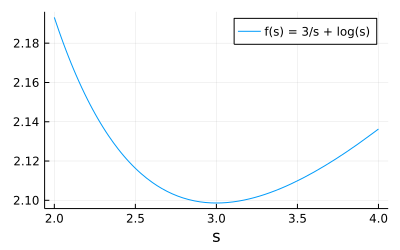

In [18]:
plot(s -> 3/s + log(s), 2, 4; label="f(s) = 3/s + log(s)", xguide="s")

ベクトル $y$ の部分空間 $X\R^r$ への直交射影 $\yhat = X\betahat$ の具体的な形を求めよう.

ベクトル $y - \yhat = y - X\betahat$ は部分空間 $X\R^r$ と直交するので, 任意の $\gamma\in\R^r$ について

$$
0 = (X\gamma, y-X\betahat) =
(X\gamma)^T(y - X\betahat) =
\gamma^T X^T(y - X\betahat).
$$

ここで, $(\ ,\ )$ は通常の内積(成分の積の和)を表す. ベクトル $\gamma\in\R^r$ は任意なので, 

$$
X^T(y - X\betahat) = 0, \quad
\text{すなわち}\quad X^T X \betahat = X^T y.
$$

$X$ のランクが可能な最大値 $r$ になると仮定していたので, $X^T X$ は可逆になるのであった. ゆえに

$$
\betahat = (X^T X)^{-1} X^T y, \quad
\yhat = X(X^T X)^{-1} X^T y.
$$

これと,

$$
\sigmahat^2 = \frac{1}{n}\|y-X\betahat\|^2
$$

を合わせると, 尤度函数 $(\beta,\sigma^2)\mapsto p(y|X,\beta,\sigma^2)$ を最小化するパラメータ値が得られる.

これが正規分布で記述された統計モデルの最尤法の解である.

$x,y$ から $\betahat = (X^T X)^{-1} X^T y$ を求めて, $\beta=\betahat$ とおくと, 二乗和 $\|y - X\beta\|$ が最小化されるので, 回帰係数 $\beta$ をその $\betahat$ として求める方法を __最小二乗法__ と呼ぶ.

$y-\yhat = y - X\betahat$ を __残差__ (residual error)と呼ぶ.

__注意:__ 以上の議論によって, 最小二乗法は本質的に直交射影を作る操作であることも分かる. このように内積に関する線形代数を理解していれば, その中に最小二乗法の理論も含まれていると考えることができる. 線形代数は普遍的に役に立つ道具である.

### βとσ²の不偏推定量

この節では, 前々節で記述した統計モデルに従う確率変数 $Y$ とは別に, ベクトル値確率変数 $y = [y_i]_{i=1}^n$ で次の条件を満たすものを使用する:

$$
y = X\beta + e, \quad E[e] = 0, \quad E[e e^T] = \sigma^2 I.
$$

このベクトル値確率変数 $y$ を使うことは, 正規分布で記述された統計モデルの設定を大幅にゆるめることを意味している.  この節ではそのような状況を扱う.

上の条件中の $E[e e^T] = \sigma^2 I$ の左辺は $e$ の分散共分散行列であることに注意せよ.

(一般に $n$ 次元ベクトル値確率変数 $V=[V_i]_{i=1}^n$ について, $\mu = E[V]$ のとき, $n\times n$ の対称行列 $E[(V-\mu)(V-\mu)^T]$ を $V$ の分散共分散行列 (variance-covariance matrix) と呼ぶ.  その $(i,i)$ 成分は $V_i$ の分散になっており, $i\ne j$ に関する $(i,j)$ 成分は $V_i$ と $V_j$ の共分散になっている.)

上の仮定の下で, $y$ の平均と分散共分散行列はそれぞれ次のようになる:

$$
E[y] = X\beta, \quad
E[(y-X\beta)(y-X\beta)^T] = E[e e^T] = \sigma^2 I.
$$

この設定における最小二乗法は次のように書ける:

$$
\betahat = (X^T X)^{-1} X^T y, \quad
\sigmahat^2 = \frac{1}{n}\|y-X\betahat\|^2.
$$

このとき,

$$
E[\betahat] = (X^T X)^{-1} X^T X\beta = \beta
$$

なので, $\betahat$ は $\beta$ の不偏推定量になっている.

以下では $\sigma^2$ の不偏推定量を構成する.

ベクトル値確率変数 $\betahat = (X^T X)^{-1} X^T y$ の分散共分散行列は

$$
\betahat - \beta = (X^T X)^{-1} X^T(X\beta + e) - \beta =
(X^T X)^{-1} X^T e
$$

より,

$$
(\betahat - \beta)(\betahat - \beta)^T=
(X^T X)^{-1} X^T e e^T X (X^T X)^{-1}
$$

なので, 次のように計算される:

$$
E[(\betahat - \beta)(\betahat - \beta)^T] =
(X^T X)^{-1} X^T E[e e^T] X (X^T X)^{-1} = \sigma^2 (X^T X)^{-1}.
$$

2つ目の等号で $E[ee^T]=\sigma^2 I$ を使った.

$X\betahat$ の分散共分散行列は,

$$
X\betahat - X\beta = X(\betahat - \beta), \quad
(X\betahat - X\beta)(X\betahat - X\beta)^T =
X(\betahat - \beta)(\betahat - \beta)^T X^T
$$

より, 次のように計算される:

$$
E[(X\betahat - X\beta)(X\betahat - X\beta)^T] =
X E[(\betahat - \beta)(\betahat - \beta)^T]X^T =
\sigma^2 X(X^T X)^{-1}X^T.
$$

2つ目の等号で, 上で示した $E[(\betahat - \beta)(\betahat - \beta)^T] = \sigma^2 (X^T X)^{-1}$ を使った.

$X(X^T X)^{-1}X^T$ は $\R^n$ からその部分空間 $X\R^r$ への直交射影を与える行列であった. (特に対称行列でかつ二乗しても不変であることにも注意せよ.)

残差 $y - X\betahat$ の分散共分散行列は,

$$
\begin{aligned}
&
y - X\betahat = y - X(X^T X)^{-1}X^T y = (I - X(X^T X)^{-1}X^T)y
\\ &
E[y - X\betahat] = E[y] - X(X^T X)^{-1}X^T E[y] =
X\beta - X(X^T X)^{-1}X^T X\beta = 0
\end{aligned}
$$

より, 次のように計算される:

$$
\begin{aligned}
E[(y - X\betahat)(y - X\betahat)^T] &=
(I - X(X^T X)^{-1}X^T)E[yy^T](I - X(X^T X)^{-1}X^T)^T
\\ &=
\sigma^2(I - X(X^T X)^{-1}X^T)(I - X(X^T X)^{-1}X^T)^T
\\ &=
\sigma^2(I - X(X^T X)^{-1}X^T).
\end{aligned}
$$

ここで, $E[yy^T]=\sigma^2 I$ および, $X(X^T X)^{-1}X^T$ が $\R^n$ から $X\R^r$ への直交射影を与える行列であったことから, $I - X(X^T X)^{-1}X^T$ が $\R^n$ から $X\R^r$ の直交補空間への射影を与える行列になり, 特に対称行列でかつ二乗しても不変になることを使った.

トレースの中で行列の順序を巡回的に回してもトレースの値は不変なので,

$$
\tr(X(X^T X)^{-1}X^T) = \tr((X^T X)^{-1}X^T X) = \tr(I_r) = r.
$$

ここで $I_r$ は $r$ 次の単位行列を表す.  この結果と

$$
\|y - X\betahat\|^2 = (y - X\betahat)^T(y - X\betahat) =
\tr\left((y - X\betahat)(y - X\betahat)^T\right)
$$

を使うと,

$$
\begin{aligned}
E[\|y - X\betahat\|^2] &=
\tr\left(E[(y - X\betahat)(y - X\betahat)^T]\right)
\\ &=
\sigma^2\tr(I - X(X^T X)^{-1}X^T) =
(n-r)\sigma^2.
\end{aligned}
$$

2つめの等号で上で示した $E[(y - X\betahat)(y - X\betahat)^T] = \sigma^2(I - X(X^T X)^{-1}X^T)$ を用い, 3つ目の等号で上で示した $\tr(X(X^T X)^{-1}X^T) = r$ を使った.

ゆえに,

$$
\shat^2 = \frac{1}{n-r} \|y - X\betahat\|^2 = \frac{n}{n-r}\sigmahat^2
$$

とおくと,

$$
E[\shat^2] = \sigma^2.
$$

すなわち, $\shat^2 = \|y - X\betahat\|^2/(n-r)$ は $\sigma^2$ の不偏推定量である.

$\sigma^2$ の不偏推定量を作るためには残差の二乗和 $\|y - X\betahat\|^2$ を $n$ ではなく, $n-r$ で割らなければいけない.

### 例: 平均の推定の場合

線形回帰は平均の推定を含む.

$r=1$ とし, $f_j(x_i)$ と $\beta_j$ のインデックス $j$ として $1$ ではなく $0$ を使うことにし, 

$$
f_0(x_i)=1, \quad
\beta_0 = \mu, \quad
\betahat_0 = \muhat
$$

の場合について考える. このとき, 計画行列 $X$ は $n$ 次元縦ベクトルになり,

$$
X = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \\ \end{bmatrix}, \quad
X\beta = \begin{bmatrix} \mu \\ \mu \\ \vdots \\ \mu \\ \end{bmatrix}.
$$

ゆえに, $X^T X = n$, $X^T y=\sum_{i=1}^n y_i$ となるので, 

$$
\muhat = (X^T X)^{-1}X^T y = \frac{1}{n}\sum_{i=1}^n y_i =: \ybar.
$$

さらに, $y - X\betahat = [y_i - \muhat]_{i=1}^n = [y_i - \ybar]_{i=1}^n$ より,

$$
\sigmahat^2 = \frac{1}{n}\|y-X\betahat\| = \frac{1}{n}\sum_{i=1}^n (y_i - \ybar)^2.
$$

これは, $\sigma^2$ の不偏推定量になるように $n-1$ で割らずに, $n$ で割って作った場合の標本分散になっている. 

前節で示したように $\sigma^2$ の不偏推定量 $\shat^2$ は $n-r=n-1$ で割ることによって得られる:

$$
\shat^2 = \frac{1}{n-1}\|y-X\betahat\| = \frac{1}{n-1}\sum_{i=1}^n (y_i - \ybar)^2.
$$

この結果は不偏分散の話の線形回帰の理論を使った再現になっている.

### 例: 単回帰の場合

$r=2$ とし, $f_j(x_i)$ と $\beta_j$ のインデックス $j$ として $1,2$ ではなく $0,1$ を使うことにし, 

$$
f_0(x_i)=1, \quad
f_1(x_i)=x_i
$$

の場合を考える. さらに, 以下のようにおく:

$$
\begin{aligned}
&
\xbar = \frac{1}{n}\sum_{i=1}^n x_i, \quad
\ybar = \frac{1}{n}\sum_{i=1}^n y_i, 
\\ &
\overline{x^2}=\frac{1}{n}\sum_{i=1}^n x_i^2, \quad
\overline{y^2}=\frac{1}{n}\sum_{i=1}^n y_i^2, \quad
\overline{xy}=\frac{1}{n}\sum_{i=1}^n x_i y_i.
\end{aligned}
$$

このとき, $x_i$ 達と $y_i$ 達の不変補正をしていない標本分散と標本共分散はそれぞれ次のように書ける:

$$
\begin{aligned}
&
\sigmahat_x^2 =
\frac{1}{n}\sum_{i=1}^n(x_i - \xbar)^2 =
\overline{x^2} - \xbar^2,
\\ &
\sigmahat_y^2 =
\frac{1}{n}\sum_{i=1}^n(y_i - \ybar)^2 =
\overline{y^2} - \ybar^2,
\\ &
\sigmahat_{xy} = 
\frac{1}{n}\sum_{i=1}^n(x_i - \xbar)(y_i - \ybar) =
\overline{xy} - \xbar\ybar.
\end{aligned}
\tag{$*$}
$$

このとき, デザイン行列 $X$ については, 以下が成立していることをちょっとした計算で確認できる(自分で確認してみよ):

$$
\begin{alignedat}{2}
&
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots\\
1 & x_n \\
\end{bmatrix}, \quad
& &
X^T X = n
\begin{bmatrix}
1 & \xbar \\
\xbar & \overline{x^2} \\
\end{bmatrix},
\\ &
X^T y = n
\begin{bmatrix}
\ybar \\
\overline{xy} \\
\end{bmatrix}, \quad
& &
(X^T X)^{-1} =
\frac{1}{n(\overline{x^2}-\xbar^2)}
\begin{bmatrix}
\overline{x^2} & -\xbar \\ -
\xbar & 1 \\
\end{bmatrix}.
\end{alignedat}
$$

ゆえに,

$$
\overline{x^2}\ybar - \xbar\overline{xy} =
\overline{x^2}\ybar - \xbar^2\ybar + \xbar^2\ybar - \xbar\overline{xy} =
\sigmahat_x^2 \ybar - \sigmahat_{xy}\xbar
$$

が成立していることに注意すれば, 

$$
\begin{bmatrix} \betahat_0 \\ \betahat_1\\ \end{bmatrix} =
\betahat =
(X^T X)^{-1}X^T y =
\begin{bmatrix}
\ybar - (\sigmahat_{xy}/\sigmahat_x^2)\xbar \\
\sigmahat_{xy}/\sigmahat_x^2\\
\end{bmatrix}.
$$

すなわち, 次の回帰直線の公式が得られた:

$$
\betahat_0 + \betahat_1 x_* =
\ybar + \frac{\sigmahat_{xy}}{\sigmahat_x^2}(x_* - \xbar).
$$

$\sigmahat^2$ の公式も求めよう. 

$$
y - X\betahat = (I - X(X^T X)^{-1}X^T)y
$$

より, 

$$
\begin{aligned}
\|y - X\betahat\|^2 &=
y^T(I - X(X^T X)^{-1}X^T)^T(I - X(X^T X)^{-1}X^T)y
\\ &=
y^T(I - X(X^T X)^{-1}X^T)y
\\ &=
y^T y - (X^T y)^T (X^T X)^{-1}X^T y.
\end{aligned}
$$

そして,

$$
\begin{aligned}
&
y^T y = n\overline{y^2}, 
\\ &
(X^T y)^T (X^T X)^{-1}X^T y =
\frac{n}{\sigmahat_x^2}
\left(\overline{x^2}-2\xbar\ybar\overline{xy} + \overline{xy}^2\right)
\end{aligned}
$$

および上の($*$)を使って整理すると,

$$
\sigmahat^2 = \frac{1}{n}\|y - X\betahat\|^2 =
\frac{\sigmahat_x^2 \sigmahat_y^2 - \sigmahat_{xy}^2}{\sigmahat_x^2}.
$$

前々節の結果より, $\sigma^2$ の不偏推定量 $\shat^2$ は $n$ ではなく, $n-r=n-2$ で割ることによって次のようにして得られる:

$$
\shat^2 = \frac{1}{n-2}\|y - X\betahat\|^2 =
\frac{n}{n-2}\frac{\sigmahat_x^2 \sigmahat_y^2 - \sigmahat_{xy}^2}{\sigmahat_x^2}.
$$

$x_i$ 達と $y_i$ 達の不偏分散と不偏共分散を

$$
s_x^2 = \frac{n}{n-1}\sigmahat_x^2, \quad
s_y^2 = \frac{n}{n-1}\sigmahat_y^2, \quad
s_{xy} = \frac{n}{n-1}\sigmahat_{xy}
$$

と書くと, 

$$
\begin{aligned}
&
\beta_0 = \ybar - \frac{\sigmahat_{xy}}{\sigmahat_x^2}\xbar =
\ybar - \frac{s_{xy}}{s_x^2}\xbar,
\quad
\beta_1 = \frac{\sigmahat_{xy}}{\sigmahat_x^2} =
\frac{s_{xy}}{s_x^2},
\\ &
\sigmahat^2 =
\frac{n-1}{n} \frac{s_x^2 s_y^2 - s_{xy}^2}{s_x^2},
\quad
\shat^2 =
\frac{n-1}{n-2} \frac{s_x^2 s_y^2 - s_{xy}^2}{s_x^2}.
\end{aligned}
$$

以上の公式は

* [「標本分布について」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb)

の「最小二乗法による線形回帰」の節で得た公式に一致する.

### 多変量正規分布の定義

$\mu\in\R^n$ と固有値がすべて正の $n$ 次の実対称行列 $\Sigma$ に対して, 多変量正規分布

$$
\MvNormal(\mu, \Sigma)
$$

の確率密度函数を次のように定める:

$$
p(y|\mu, \Sigma) =
\frac{1}{\det(2\pi\Sigma)^{1/2}}
\exp\left(-\frac{1}{2}(y-\mu)^T\Sigma^{-1}(y-\mu)\right)
\quad (y\in\R^n)
$$

例えば, $\mu=(m,m,\ldots,m)$, $\Sigma = \sigma^2 I$ ($I$ は $n$ 次の単位行列で $\sigma^2>0$)のとき,

$$
p(y|\mu, \Sigma) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - m)^2\right).
$$

これは正規分布の標本分布 $\Normal(m,\sigma^2)^n$ の密度函数に等しい.

### 問題: 多変量正規分布とχ²分布の関係

前節の $n$ 変量正規分布 $\MvNormal(\mu, \Sigma)$ を考える:

$$
p(y|\mu, \Sigma) =
\frac{1}{\det(2\pi\Sigma)^{1/2}}
\exp\left(-\frac{1}{2}(y-\mu)^T\Sigma^{-1}(y-\mu)\right)
\quad (y\in\R^n).
$$

この分布に従う $n$ 次元ベクトル値確率変数を $Y$ と書き, 確率変数 $\chi^2$ を

$$
\chi^2 = (Y-\mu)^T\Sigma^{-1}(Y-\mu)
$$

と定めると, $\chi^2$ は自由度 $n$ のχ²分布に従うことを示せ.

__解答例:__ 実対称行列 $\Sigma$ は直交行列 $U$ で対角化できる.

$$
\Sigma = UD^2U^{-1} = UD^2U^T, \quad
D = \diag(\sigma_1,\ldots,\sigma_n), \quad \sigma_i > 0.
$$

このとき,

$$
\det(2\pi\Sigma)^{1/2} = \prod_{i=1}^n(2\pi\sigma_i^2)^{1/2} =
(2\pi)^{n/2}\sigma_1\cdots\sigma_n.
$$

さらに, $x = [x_i]_{i=1}^n = D^{-1}U^T(y-\mu)$ とおくと, $\Sigma^{-1}=UD^{-2}U^T$ より

$$
(y-\mu)^T\Sigma^{-1}(y-\mu) = x^T x
$$

となり, 直交行列による変換が体積を保つことより, 

$$
|dy_1\cdots dy_n| = \sigma_1\cdots\sigma_n\, |dx_1\cdots dx_n|
$$

となるので, 

$$
\begin{aligned}
p(y|\mu,\Sigma)\,|dy_1\cdots dy_n| &=
\frac{1}{(2\pi)^{n/2}\sigma_1\cdots\sigma_n}
\exp\left(-\frac{1}{2}(y-\mu)^T\Sigma^{-1}(y-\mu)\right)\,|dy_1\cdots dy_n|
\\ &=
\frac{1}{(2\pi)^{n/2}}
\exp\left(-\frac{1}{2}x^T x\right)\,|dx_1\cdots dx_n|
\\ &=
\frac{1}{(2\pi)^{n/2}}
\exp\left(-\frac{1}{2}\sum_{i=1}^n x_i^2\right)\,|dx_1\cdots dx_n|.
\end{aligned}
$$

ゆえに, 変数 $x$ に対応するベクトル値確率変数を $X=[X_i]_{i=1}^n$ と書くと, $X_1,\ldots,X_n$ はそれぞれが標準正規分布に従う独立な確率変数達になり, 

$$
\chi^2 = (Y-\mu)^T\Sigma^{-1}(Y-\mu) = X^T X = \sum_{i=1}^n X_i^2
$$

となるので, $\chi^2$ は自由度 $n$ のχ²分布に従う. 

__解答終__

### 真の回帰函数と推定された回帰函数

「βとσ²の不偏推定量」の節の仮定の下で, $x_*\in\R$ の函数

$$
f(x_*)^T\beta = \sum_{j=1}^r \beta_j f_j(x_*)
$$

を __真の回帰函数__ と呼び, 

$$
f(x_*)^T\betahat = \sum_{j=1}^r \betahat_j f_j(x_*)
$$

を __推定された回帰函数__ と呼ぶことにする.

__注意:__ 真の回帰函数の「真の」の意味は「現実における真の」という意味ではない.

### 信頼区間 (標準正規分布版)

この節では, 「βとσ²の不偏推定量」の節で仮定した条件に加えて, ベクトル値 $\betahat = (X^T X)^{-1}X^T y$ が近似的に多変量正規分布に従い, $\shat^2 \approx \sigma^2$ という近似が成立していると仮定する.

このとき, 「βとσ²の不偏推定量」の節で示した結果

$$
E[\betahat] = \beta, \quad
E[(\betahat - \beta)(\betahat - \beta)^T] = \sigma^2 (X^T X)^{-1}
$$

より, 次の近似が成立している:

$$
\betahat \sim \MvNormal(\beta,\; \shat^2 (X^T X)^{-1}), \ \text{approximately}.
$$

ゆえに, $x_*\in\R$ について,

$$
f(x_*)^T\betahat
\sim \Normal\left(f(x_*)^T\beta,\; \SEhat_{f(x_*)^T\betahat}\right),
\ \text{approximately}.
$$

ここで,

$$
\SEhat_{f(x_*)^T\betahat} = \shat\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}
$$

これより, 真の回帰函数の $x_*\in\R$ の値 $f(x_*)^T\beta$ に関する仮説 $f(x_*)^T\beta = f(x_*)^T\beta_0$ のP値と $f(x_*)^T\beta$ の値の信頼区間を定義できる.

__仮説 $f(x_*)^T\beta = f(x_*)^T\beta_0$ のP値の定義:__ $t(x_*, \beta_0)$ を

$$
t(x_*, \beta_0) =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta_0}
{\SEhat_{f(x_*)^T\betahat}} =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta_0}
{\shat\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}}
$$

と定め, P値を次のように定める:

$$
\pvalue_{\Normal}(y|X, f(x_*)^T\beta=f(x_*)\beta_0) =
2(1 - \cdf(\Normal(0,1), |t(x_*, \beta_0)|)).
$$

__真の回帰函数上の値 $f(x_*)^T\beta$ の信頼度 $1-\alpha$ の信頼区間の定義:__ $z_{\alpha/2}$ を

$$
z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2).
$$

と定め, 信頼区間を次のように定める:

$$
\confint^{f(x_*)^T\beta}_{\Normal}(y|X) = \left[
f(x_*)^T\betahat - z_{\alpha/2}\SEhat_{f(x_*)^T\betahat},\;
f(x_*)^T\betahat + z_{\alpha/2}\SEhat_{f(x_*)^T\betahat}
\right].
$$

### 信頼区間 (t分布版)

前節の標準正規分布を使って定義されたP値と信頼区間の $t$ 分布を使った補正を構成しよう.

そのために, 前節までに仮定していた条件よりもさらに強い次の条件を仮定する:

$$
e = [e_i]_{i=1}^n \sim \Normal(0,\sigma)^n = \MvNormal(0, \sigma^2 I).
$$

これは正規分布で記述されていた統計モデル内の設定に戻ったことを意味している.

このとき, 

$$
\betahat \sim \MvNormal(\beta,\; \sigma^2 (X^T X)^{-1}).
$$

ゆえに, $x_*\in\R$ について,

$$
f(x_*)^T\betahat
\sim \Normal\left(f(x_*)^T\beta,\; \SE_{f(x_*)^T\betahat}\right).
$$

ここで,

$$
\SE_{f(x_*)^T\betahat} = \sigma\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}.
$$

さらに, 

$$
y - X\betahat = (X\beta + e) - X(X^T X)^{-1}X^T(X\beta + e) =
(I - X(X^T X)^{-1}X^T)e
$$

が部分空間 $X\R^r$ の直交補空間($n-r$ 次元になる)へのベクトル値確率変数 $e \sim \MvNormal(0, \sigma^2 I)$ の直交射影であることから, 

$$
\frac{(n-r)\shat^2}{\sigma^2} = \|y - X\betahat\|^2 \sim \Chisq(n-r)
$$

となることを示せる. (「多変量正規分布とχ²分布の関係」を使えば容易に示される.)

$\yhat = X\betahat$ と $y-\yhat = y-X\betahat$ が独立であることより(その独立性はそれらが直交することから導かれる), $f(x_*)^T\betahat$ と $(n-r)\shat^2/\sigma^2 = \|y - X\betahat\|^2$ が独立になることも導かれるので, 一般に独立な確率変数達 $Z\sim\Normal(0,1)$ と $Y\sim\Chisq(\nu)$ について,

$$
\frac{Z}{\sqrt{Y/\nu}} \sim \TDist(\nu)
$$

となることより, 

$$
t(x_*, \beta) =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta}
{\SEhat_{f(x_*)^T\betahat}} =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta}
{\shat\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}}
\sim \TDist(n-r).
$$

これを使うと $t$ 分布を使って補正したP値と信頼区間を以下のように定義できる:

__仮説 $f(x_*)^T\beta = f(x_*)^T\beta_0$ のP値の定義:__ $t(x_*, \beta_0)$ を

$$
t(x_*, \beta_0) =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta_0}
{\SEhat_{f(x_*)^T\betahat}} =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta_0}
{\shat\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}}
$$

と定め, P値を次のように定める:

$$
\pvalue_{\TDist}(y|X, f(x_*)^T\beta=f(x_*)\beta_0) =
2(1 - \cdf(\TDist(n-r), |t(x_*, \beta_0)|)).
$$

__真の回帰函数上の値 $f(x_*)^T\beta$ の信頼度 $1-\alpha$ の信頼区間の定義:__ $t_{\nu, \alpha/2}$ を

$$
t_{\nu, \alpha/2} = \quantile(\TDist(\nu), 1-\alpha/2).
$$

と定め, 信頼区間を次のように定める:

$$
\confint^{f(x_*)^T\beta}_{\TDist}(y|X) = \left[
f(x_*)^T\betahat - t_{n-r, \alpha/2}\SEhat_{f(x_*)^T\betahat},\;
f(x_*)^T\betahat + t_{n-r, \alpha/2}\SEhat_{f(x_*)^T\betahat}
\right].
$$



### 予測区間

前節の仮定 $e\sim \Normal(0,\sigma)^n$ に加えて、さらに

$$
\begin{bmatrix}e \\ e_*\\ \end{bmatrix} \sim \Normal(0,\sigma)^{n+1}
$$

と仮定し, 任意に $x_*\in\R$ を取り,

$$
y_* = f(x_*)^T\beta + e_*
$$

とおく. このとき,

$$
y_* - f(x_*)^T\betahat = f(x_*)^T\beta - f(x_*)^T\betahat + e_*
\sim \Normal\left(0, \SE_{y_* - f(x_*)^T\betahat}\right).
$$

ここで,

$$
\SE_{y_* - f(x_*)^T\betahat} = 
\sigma\sqrt{1 + f(x_*)^T(X^T X)^{-1}f(x_*)}.
$$

前節の $\SE_{f(x_*)^T\betahat}$ との違いは平方根の中に $e_*$ の分散から出て来た $1$ が含まれていることである. 

これより,

$$
\SEhat_{y_* - f(x_*)^T\betahat} = 
\shat\sqrt{1 + f(x_*)^T(X^T X)^{-1}f(x_*)}.
$$

とおくと, 前節と同様にして,

$$
\frac{y_* - f(x_*)^T\betahat}{\SEhat_{y_* - f(x_*)^T\betahat}}
\sim \TDist(n-r).
$$

これを使って, $y_*$ の __予測区間__ (prediction interval)を次のように定義できる:

$$
\predint^{y_*}_{\TDist}(y|X) = \left[
f(x_*)^T\betahat - t_{n-r, \alpha/2}\SEhat_{y_* - f(x_*)^T\betahat},\;
f(x_*)^T\betahat + t_{n-r, \alpha/2}\SEhat_{y_* - f(x_*)^T\betahat}
\right].
$$

前節の $\SEhat_{f(x_*)^T\betahat}$ と $\SEhat_{y_* - f(x_*)^T\betahat}$ の違いは, 後者の定義式の平方根中に $1$ が含まれていることである. だから, 予測区間は信頼区間よりも必ず広くなる.  そうなる理由は $y_*$ の定義を見れば明らかで, $y_*$ の定義にはノイズの項 $e_*$ が含まれている.  その分だけ区間の幅が広くなる.

## 線形回帰の計算例

In [116]:
function plot_linreg_confint_predint(x, y, F...; α = 0.05, kwargs...)
    n = length(x)
    r = length(F)
    X = [fⱼ(xᵢ) for xᵢ in x, fⱼ in F] # design matrix
    β̂ = X \ y # equivalent to β̂ = X*(X'X)\X'y
    ŷ = X * β̂ # orthogonal projection of y onto Xℝʳ
    
    f̂(xstar) = sum(β̂ⱼ * fⱼ(xstar) for (β̂ⱼ, fⱼ) in zip(β̂, F))
    ŝ = norm(y - ŷ)/√(n - r)  # ŝ² is the unbiased estimator of σ²
    f(xstar) = [fⱼ(xstar) for fⱼ in F]
    invXX = inv(X'X)
    g(xstar) = ŝ * √(    f(xstar)' * invXX * f(xstar))
    h(xstar) = ŝ * √(1 + f(xstar)' * invXX * f(xstar))
    t = quantile(TDist(n - r), 1 - α/2)

    @show β̂ ŝ

    a, b = extrema(x)
    a, b = a - 0.05(b-a), b + 0.05(b-a)
    scatter(x, y; label="data", msc=:auto, c=1)
    plot!(f̂, a, b; label="", c=:red)
    plot!(xstar -> f̂(xstar) - g(xstar), a, b; label="$(100(1-α))% CI", c=2, ls=:dash)
    plot!(xstar -> f̂(xstar) + g(xstar), a, b; label="", c=2, ls=:dash)
    plot!(xstar -> f̂(xstar) - h(xstar), a, b; label="$(100(1-α))% PI", c=3, ls=:dashdot)
    plot!(xstar -> f̂(xstar) + h(xstar), a, b; label="", c=3, ls=:dashdot)
    plot!(; size=(520, 250), legend=:outertopright)
    plot!(; kwargs...)
end

plot_linreg_confint_predint (generic function with 1 method)

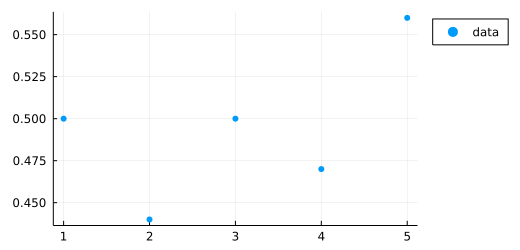

In [117]:
x = 1:5
y = [0.5, 0.44, 0.5, 0.47, 0.56]
scatter(x, y; label="data", legend=:topleft, msc=:auto)
plot!(; size=(520, 250), legend=:outertopright)

β̂ = [0.4490000000000001, 0.014999999999999984]
ŝ = 0.04347413023856834


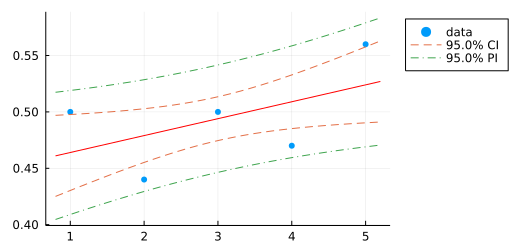

In [118]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:1)...)

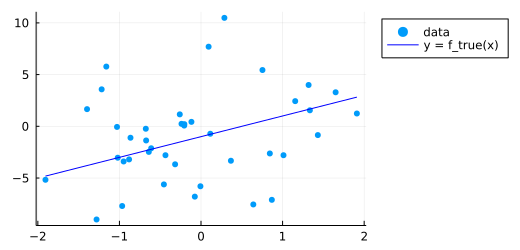

In [110]:
Random.seed!(4649373)

n = 40
f_true(x) = -1 + 2x
x = rand(Normal(0,1), n)
y = f_true.(x) + 4randn(n)
scatter(x, y; label="data", legend=:topleft, msc=:auto)
plot!(f_true, extrema(x)...; label="y = f_true(x)", c=:blue)
plot!(; size=(520, 250), legend=:outertopright)

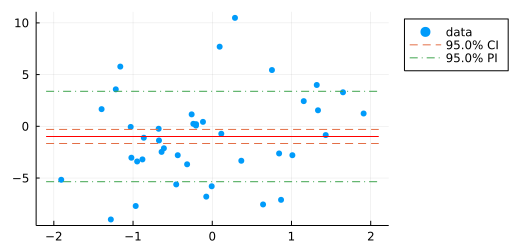

In [111]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:0)...)

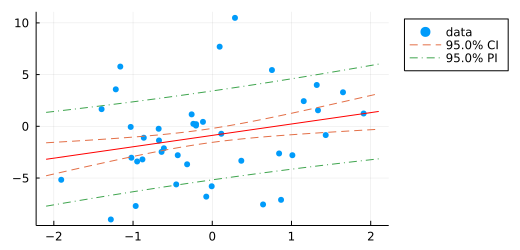

In [112]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:1)...)

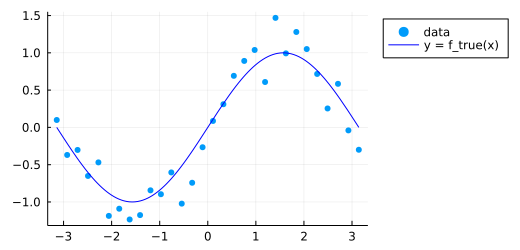

In [85]:
n = 30
f_true(x) = sin(x)
x = range(-π, π, n)
y = f_true.(x) + 0.3randn(n)
scatter(x, y; label="data", legend=:topleft, msc=:auto)
plot!(f_true, extrema(x)...; label="y = f_true(x)", c=:blue)
plot!(; size=(520, 250), legend=:outertopright)

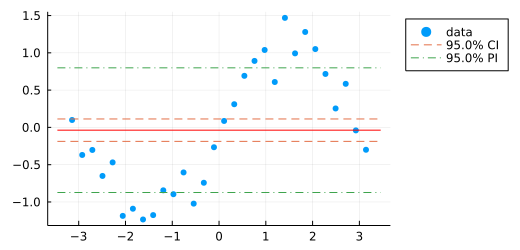

In [86]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:0)...)

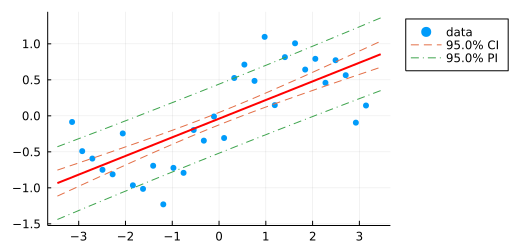

In [80]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:1)...)

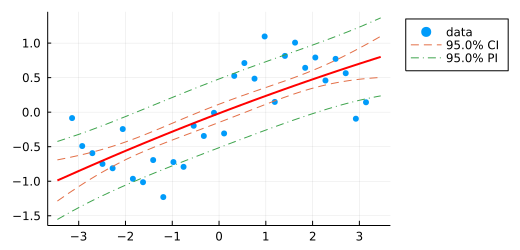

In [81]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:2)...)

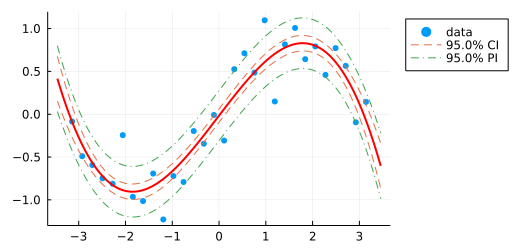

In [82]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:3)...)

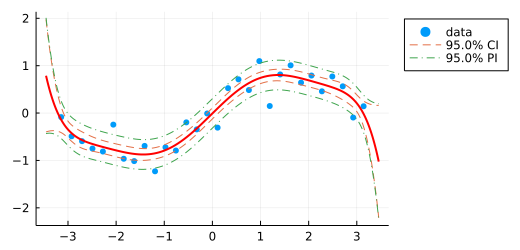

In [83]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:7)...)

## ロジスティック回帰